In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from keras import metrics

import os
print(os.listdir("../input"))



Using TensorFlow backend.


['spam.csv']


**Data converted to dataframe**

In [2]:
data = pd.read_csv('../input/spam.csv',encoding='latin-1')

In [3]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":'label', "v2":'text'})
tags = data["label"]
texts = data["text"]

for k in range(len(tags)):
    if (tags[k]=='ham'):
        tags[k]='normal'
    else:
        tags[k]='spam'

h=data['label']=='spam'
print("Spam sms count" ,len(data[h]))
h=data['label']=='normal'
print("Normal sms count" ,len(data[h]))

Spam sms count 747
Normal sms count 4825


**Redundant spaces cleared**

In [4]:
print (data.head())
print('***************************************************')
print('Spam Sms Example  :  ',data.text.iloc[2])
print('***************************************************')
print('Normal Sms Example  :  ',data.text.iloc[3])

    label                                               text
0  normal  Go until jurong point, crazy.. Available only ...
1  normal                      Ok lar... Joking wif u oni...
2    spam  Free entry in 2 a wkly comp to win FA Cup fina...
3  normal  U dun say so early hor... U c already then say...
4  normal  Nah I don't think he goes to usf, he lives aro...
***************************************************
Spam Sms Example  :   Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
***************************************************
Normal Sms Example  :   U dun say so early hor... U c already then say...


In [9]:
## For enumeration up to a maximum of 1000
num_max = 1000

## Tags make 0 and 1
le = LabelEncoder()
tags = le.fit_transform(tags)

## The process of enumerating words
tok = Tokenizer(num_words=num_max)
tok.fit_on_texts(texts)

# Number of word counts
#print(tok.word_docs)

In [20]:
# Indexing the word
#print(tok.word_index)

In [21]:
# For example, how to enumerate words
print(texts[1])
print(tok.word_index['ok'],tok.word_index['lar'],tok.word_index['joking'],tok.word_index['wif'],tok.word_index['u'],tok.word_index['oni'])

Ok lar... Joking wif u oni...
46 336 1495 470 6 1929


In [22]:
## A maximum of 100 words and sentences are maintained
max_len = 100
cnn_texts_seq = tok.texts_to_sequences(texts)
for i in range(len(cnn_texts_seq)):
    if(len(cnn_texts_seq[i])>100):
        print('Word Counts:', len(cnn_texts_seq[i]),'Indeks:',i)


Word Counts: 172 Indeks: 1084
Word Counts: 143 Indeks: 1862
Word Counts: 101 Indeks: 2157
Word Counts: 101 Indeks: 2847


In [23]:
## A maximum of 100 words and sentences are maintained
## The number of words is made from 100. Missing words are written to 0.

cnn_texts_mat = sequence.pad_sequences(cnn_texts_seq,maxlen=max_len)

## There are 30 words in the second sentence.
## All words are indexed
## The most used 1000 words are taken.
## Less used words are removed.
## If the number of words is less than 100, 0 is added. 
## If the number of words is greater than 100 is deleted
print('***************************************************')
print(texts[2])
print(cnn_texts_mat[2])
print('***************************************************')


***************************************************
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  47 486   8  19   4 796 899   2 178 658 267  71   2
   2 337 486 554 955  73 388 179 659 389]
***************************************************


In [24]:
## Number of words 101
## The word sad has been deleted.
## There are 100 words left.
print('***************************************************')
print(texts[2157])
print('***************************************************')
print(cnn_texts_mat[2157])
print('***************************************************')

print('sad index:',tok.word_index['sad'], 'story index:',tok.word_index['story'])


***************************************************
Sad story of a Man - Last week was my b'day. My Wife did'nt wish me. My Parents forgot n so did my Kids . I went to work. Even my Colleagues did not wish. As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there. She said,'' do u mind if I go into the bedroom for a minute ? '' ''OK'', I sed in a sexy mood. She came out 5 minuts latr wid a cake...n My Wife, My Parents, My Kidz, My Friends n My Colleagues. All screaming.. SURPRISE !! and I was waiting on the sofa.. ... ..... ' NAKED...!
***************************************************
[615  15   4 287 173 112  59  11  11 454 256  10  11 761 397  89  23 114
  11   1 216   2 142 211  11 114  25 256  72   1 971  11  11 395 159 590
 135 590   1 851 262  95 916  10  42 285 155 285  95 917  10   2 103  39
 216  67  95 159 590  27   6 319  34   1  50 360   5  12   4 644 590   1
   8   4 482  9

In [25]:
model = Sequential()
model.add(Embedding(1000,20,input_length=max_len))
model.add(Dropout(0.2))
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 20)           20000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 20)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            6464      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)  

In [26]:
history=model.fit(cnn_texts_mat,tags,batch_size=32,epochs=10,verbose=1,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 4457 samples, validate on 1115 samples
Epoch 1/10
4457/4457 [==============================] - 2s 410us/step - loss: 0.4061 - acc: 0.8598 - val_loss: 0.3517 - val_acc: 0.8700
Epoch 2/10
4457/4457 [==============================] - 1s 245us/step - loss: 0.1793 - acc: 0.9329 - val_loss: 0.0751 - val_acc: 0.9812
Epoch 3/10
4457/4457 [==============================] - 1s 202us/step - loss: 0.0630 - acc: 0.9816 - val_loss: 0.0461 - val_acc: 0.9865
Epoch 4/10
4457/4457 [==============================] - 1s 204us/step - loss: 0.0487 - acc: 0.9870 - val_loss: 0.0522 - val_acc: 0.9839
Epoch 5/10
4457/4457 [==============================] - 1s 205us/step - loss: 0.0382 - acc: 0.9901 - val_loss: 0.0440 - val_acc: 0.9883
Epoch 6/10
4457/4457 [==============================] - 1s 203us/step - loss: 0.0346 - acc: 0.9915 - val_loss: 0.0464 - val_acc: 0.9883
Epoch 7/10

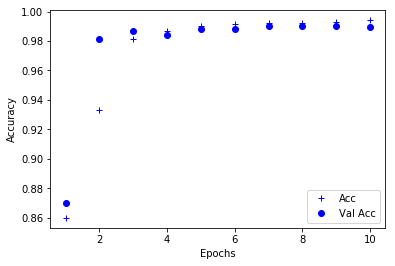

In [27]:
import matplotlib.pyplot as plt
epochs = range(1, 11)
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'b+', label='Acc')
plt.plot(epochs, val_acc, 'bo', label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()